#May the Fourth Maker Challenge



Jannet Galván  @CheRaton_

###Who is who?



#Machine Learning Model

Fast AI and ipywidgets were used to conform the model 

In [22]:
import ipywidgets as widgets
from fastai.vision import *
from fastai import *
import warnings
warnings.filterwarnings("ignore")

In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Starting the model 

##Export dataset

previously all the images realated with the droids were downloaded. These were divided by three folder: r2d2, bb8 and otros. In "otros" there are all the others (or not) the droids that are not r2d2 or bb8. 

In [24]:
path = Path('/content/drive/MyDrive/starwars')
path.ls()

[PosixPath('/content/drive/MyDrive/starwars/r2d2'),
 PosixPath('/content/drive/MyDrive/starwars/bb8'),
 PosixPath('/content/drive/MyDrive/starwars/otros'),
 PosixPath('/content/drive/MyDrive/starwars/models'),
 PosixPath('/content/drive/MyDrive/starwars/star wars.ipynb')]

## We going to create our valid set with the 20 % of the dataset

In [25]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

##Detect classes in *dataset*

In [26]:
data.classes

['bb8', 'otros', 'r2d2']

##Display one part of the batch with the labels 
tree rows in this case 

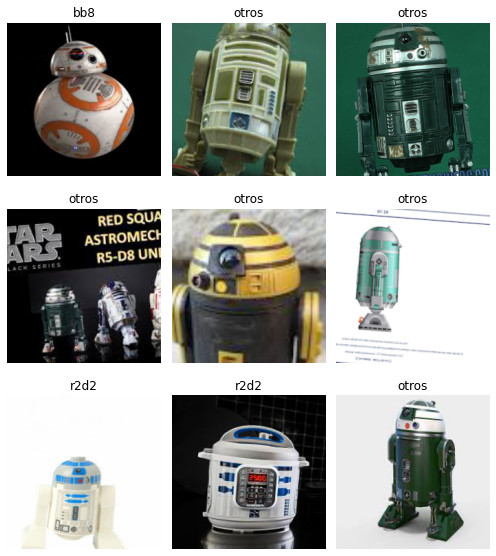

In [27]:
data.show_batch(rows=3, figsize=(7,8))

All photos were downloaded in google images

In [28]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bb8', 'otros', 'r2d2'], 3, 368, 91)

#Training the model

##Creating a CNN 
With pre-trained model resnet34

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [30]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.597901,0.858580,0.384615,00:10
1,1.016105,0.380225,0.109890,00:10
2,0.726666,0.241748,0.054945,00:10
3,0.552493,0.195289,0.054945,00:10
4,0.445313,0.176703,0.054945,00:10


In [31]:
learn.save('stage-1')

Taking all the dataset with unfreeze command 

In [32]:
learn.unfreeze()

run the command line of learning rate finder and plot it



In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


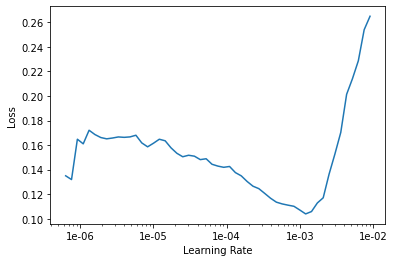

In [34]:
learn.recorder.plot()

Choose the negative slope (bigger), where the model is training in the best way

In [35]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.201658,0.919617,0.175824,00:10
1,0.267131,1.351599,0.274725,00:10


In [36]:
learn.save('stage-2')

#How the data is 
#How the training was...

In [37]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (368 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
r2d2,r2d2,r2d2,r2d2,r2d2
Path: /content/drive/MyDrive/starwars;

Valid: LabelList (91 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bb8,r2d2,bb8,otros,bb8
Path: /content/drive/MyDrive/starwars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

#Turn on the model 

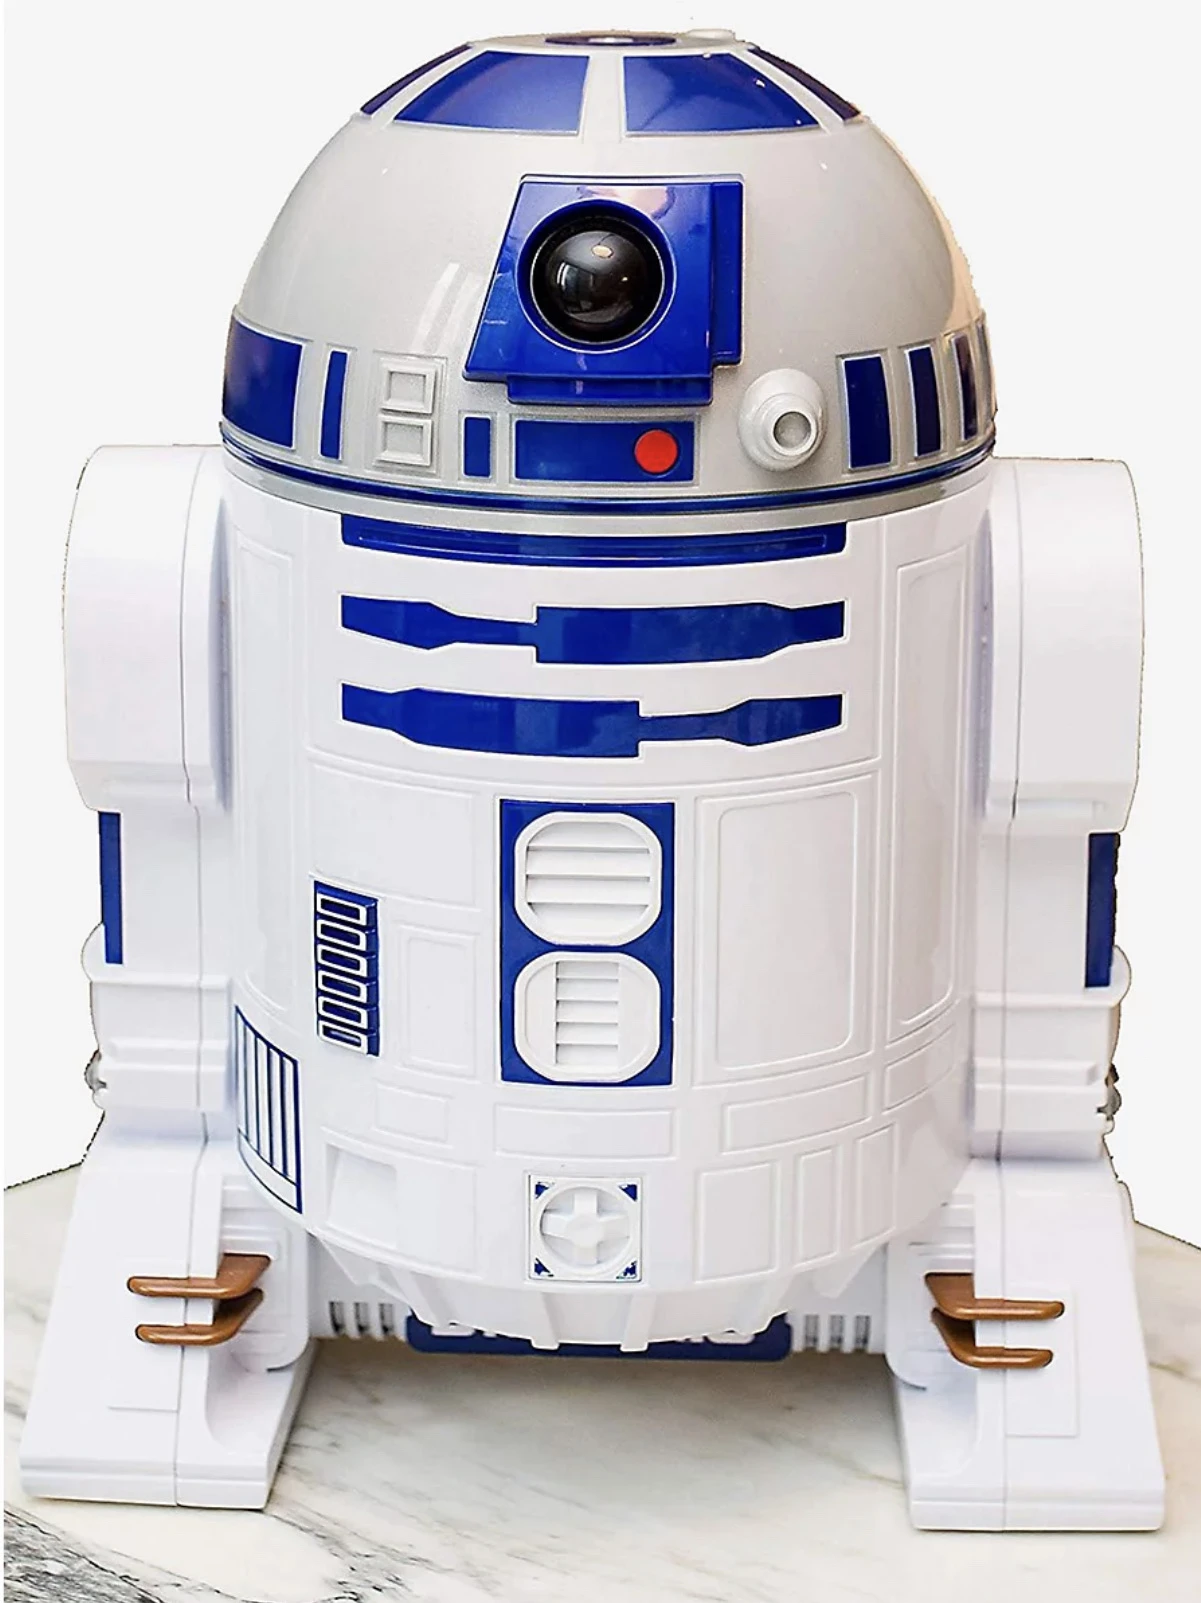

In [40]:
img = open_image(path/'/content/drive/MyDrive/test/image_29a142be-0eda-4679-84c2-8594cffd9c08_2048x2048.webp')
img

In [41]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'r2d2'

We just to identify a Arturitouu!!

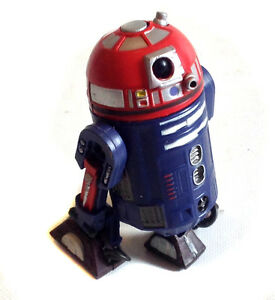

In [42]:
img1 = open_image(path/'/content/drive/MyDrive/test/s-l300.jpg')
img1

In [43]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class.obj

'otros'